In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
train_data=pd.read_csv('fashion-mnist_train.csv')

In [4]:
test_data=pd.read_csv('fashion-mnist_test.csv')

In [5]:
train_data.shape

(60000, 785)

In [6]:
test_data.shape

(10000, 785)

In [7]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data_pixels=train_data.drop(['label'],axis=1)

In [9]:
test_data_pixels=test_data.drop(['label'],axis=1)

In [10]:
train_data_pixels.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=20,random_state=10)
kmeans_model_train=kmeans.fit(train_data_pixels)
clusters=kmeans_model_train.predict(test_data_pixels)
kmeans_model_train.cluster_centers_.shape

(20, 784)

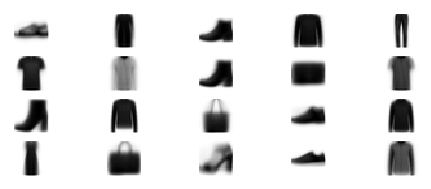

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(4, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(20, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [14]:
from scipy.stats import mode
labels=np.zeros_like(clusters)
for i in range(20):
    mask=(clusters==i)
    labels[mask] = mode(test_data["label"][mask])[0]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data["label"], labels)


0.6637

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=60)
train_data_pixel_proj = tsne.fit_transform(train_data_pixels)
test_data_pixel_proj = tsne.fit_transform(test_data_pixels)

In [19]:
kmeans=KMeans(n_clusters=20,random_state=60)
kmeans_model_train=kmeans.fit(train_data_pixel_proj)
clusters=kmeans_model_train.predict(test_data_pixel_proj)
kmeans_model_train.cluster_centers_.shape

(20, 2)

In [20]:
labels_proj = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels_proj[mask] = mode(test_data["label"][mask])[0]

In [21]:
accuracy_score(test_data["label"], labels_proj)

0.4265

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


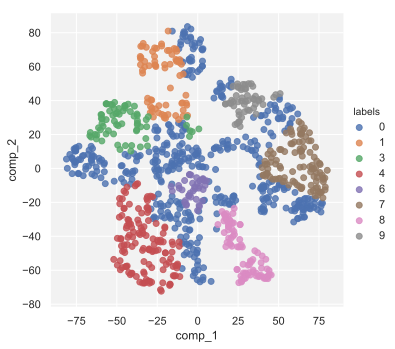

In [25]:
matplotlib.rcParams['figure.figsize']=(10.0,10.0)
proj = pd.DataFrame(test_data_pixel_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels_proj
sns.lmplot("comp_1", "comp_2",hue="labels",data=proj.sample(1000),fit_reg=False)
print("ready")